In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64  # number of trajectories (batch size)
N = 100  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [4]:
model.load_model("models/100DCallOption.pth")

In [5]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 1.004e+02, Y0: 5.628, Time: 0.78, Learning Rate: 1.000e-04
It: 20000, Loss: 2.282e+01, Y0: 5.086, Time: 33.95, Learning Rate: 1.000e-04
It: 20100, Loss: 6.240e+01, Y0: 5.377, Time: 34.26, Learning Rate: 1.000e-04
It: 20200, Loss: 6.192e+01, Y0: 5.216, Time: 34.19, Learning Rate: 1.000e-04
It: 20300, Loss: 5.028e+01, Y0: 5.068, Time: 34.22, Learning Rate: 1.000e-04
It: 20400, Loss: 6.522e+01, Y0: 5.115, Time: 34.48, Learning Rate: 1.000e-04
It: 20500, Loss: 1.102e+01, Y0: 5.138, Time: 33.93, Learning Rate: 1.000e-04
It: 20600, Loss: 3.649e+01, Y0: 5.257, Time: 33.95, Learning Rate: 1.000e-04
It: 20700, Loss: 4.467e+01, Y0: 5.339, Time: 34.16, Learning Rate: 1.000e-04
It: 20800, Loss: 1.641e+01, Y0: 4.928, Time: 34.33, Learning Rate: 1.000e-04
It: 20900, Loss: 1.931e+02, Y0: 5.010, Time: 34.06, Learning Rate: 1.000e-04
It: 21000, Loss: 3.449e+01, Y0: 5.003, Time: 33.87, Learning Rate: 1.000e-04
It: 21100, Loss: 1.413e+01, Y0: 5.281, Time: 34.05, Learning Rate: 1.0

In [5]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


In [6]:
graph = model.iteration, model.training_loss

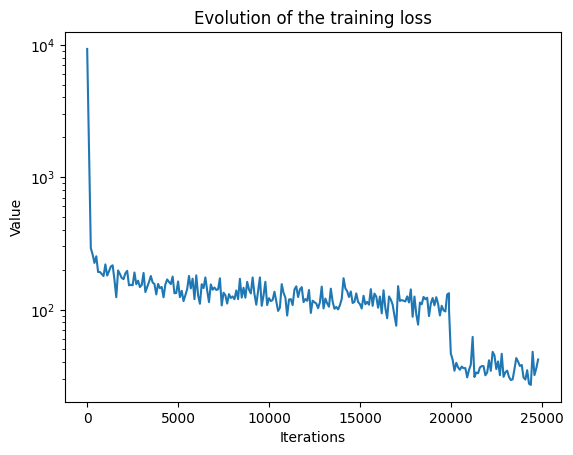

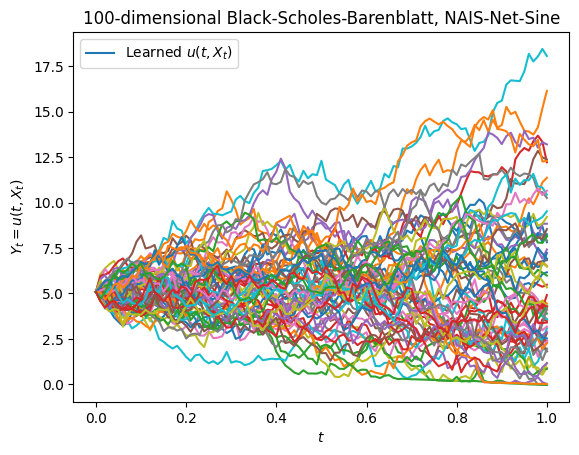

In [7]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T)

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [8]:
Y_pred.shape

(4096, 101, 1)

In [9]:
Y_preds = Y_pred.reshape(4096, 101)

In [10]:
time_stamps = t_test[0].reshape(101,)
time_stamps

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ], dtype=float32)

In [11]:
Y_preds[:,0][:,None]

array([[5.089442],
       [5.089442],
       [5.089442],
       ...,
       [5.089442],
       [5.089442],
       [5.089442]], dtype=float32)

In [12]:
Y_preds

array([[ 5.0894418e+00,  4.6582861e+00,  4.4468527e+00, ...,
         8.3307161e+00,  8.2394037e+00,  8.1334066e+00],
       [ 5.0894418e+00,  4.5720077e+00,  5.0370064e+00, ...,
         4.0062151e+00,  4.6113195e+00,  4.4427319e+00],
       [ 5.0894418e+00,  5.0630617e+00,  4.7240949e+00, ...,
         1.0869258e-02, -3.2396978e-03, -1.6320413e-03],
       ...,
       [ 5.0894418e+00,  5.0334458e+00,  5.0963588e+00, ...,
         4.1634026e+00,  4.3347521e+00,  4.8956199e+00],
       [ 5.0894418e+00,  4.3626890e+00,  4.1759310e+00, ...,
         5.2468433e+00,  5.1374292e+00,  4.6078954e+00],
       [ 5.0894418e+00,  4.6160645e+00,  4.8343310e+00, ...,
         3.3412400e-01,  7.6495372e-02,  6.1838426e-02]], dtype=float32)

In [15]:
r = 0.05

In [16]:
Y_preds[:,-1]

array([ 8.1334066e+00,  4.4427319e+00, -1.6320413e-03, ...,
        4.8956199e+00,  4.6078954e+00,  6.1838426e-02], dtype=float32)

In [17]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([5.0896616, 5.0905976, 5.091939 , 5.092901 , 5.0913324, 5.08846  ,
       5.0829983, 5.0762196, 5.080835 , 5.090485 , 5.0840006, 5.0865645,
       5.0974236, 5.091088 , 5.082472 , 5.0807004, 5.083772 , 5.092786 ,
       5.084855 , 5.087493 , 5.092301 , 5.096989 , 5.1103697, 5.1052146,
       5.1107855, 5.1128616, 5.1114   , 5.1120424, 5.120066 , 5.1220927,
       5.1225   , 5.1214533, 5.1284533, 5.1279426, 5.130467 , 5.136813 ,
       5.1410613, 5.136681 , 5.1378098, 5.130152 , 5.133643 , 5.1330557,
       5.1228256, 5.118163 , 5.128599 , 5.1297283, 5.1232576, 5.1244655,
       5.1181674, 5.117037 , 5.1205215, 5.132585 , 5.132624 , 5.1366367,
       5.1430154, 5.1503253, 5.144402 , 5.1475234, 5.1504564, 5.152339 ,
       5.1505423, 5.143052 , 5.138903 , 5.1410127, 5.1597967, 5.1602225,
       5.150007 , 5.1531386, 5.1503477, 5.1505847, 5.1500545, 5.1423345,
       5.1369543, 5.1282916, 5.1252   , 5.127192 , 5.1321445, 5.1326065,
       5.1326027, 5.1299944, 5.1293488, 5.129362 , 

In [18]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [19]:
from scipy.stats import multivariate_normal as normal
dw_sample = normal.rvs(size=[40000, D, N]) * np.sqrt(T/N)
x_sample = np.zeros([40000, D, N + 1]) 
x_sample[:, :, 0] = np.ones([40000, D]) * 1
factor = np.exp((0.05-(0.4**2)/2)*(T/N))
for i in range(N):   
    x_sample[:, :, i + 1] = (factor * np.exp(0.4 * dw_sample[:, :, i])) * x_sample[:, :, i]

In [20]:
x_sample

array([[[1.        , 0.95541059, 0.95661801, ..., 1.44862314,
         1.62094601, 1.63885834],
        [1.        , 0.97865237, 1.01483654, ..., 1.9633133 ,
         1.90893181, 1.9310551 ],
        [1.        , 0.95618558, 0.99929443, ..., 0.6680765 ,
         0.67934099, 0.71397849],
        ...,
        [1.        , 1.01099717, 0.99586829, ..., 0.50708697,
         0.51031813, 0.51094784],
        [1.        , 1.05126222, 1.04327439, ..., 1.34142638,
         1.33988843, 1.29316387],
        [1.        , 1.0319589 , 1.06506077, ..., 1.13655392,
         1.18054457, 1.18906659]],

       [[1.        , 1.00047726, 0.99334534, ..., 0.61582907,
         0.60425081, 0.60269686],
        [1.        , 0.97799116, 0.99401139, ..., 1.96877466,
         1.93077887, 2.0439359 ],
        [1.        , 1.00049303, 0.95082209, ..., 0.61010646,
         0.59376938, 0.60011333],
        ...,
        [1.        , 0.99125733, 1.09076405, ..., 1.67445151,
         1.60628191, 1.59662392],
        [1. 

In [21]:
portfolio = np.sum(x_sample, axis=1, keepdims=True)
portfolio

array([[[100.        , 100.24705914,  99.8801856 , ..., 108.56362597,
         108.38240019, 107.31279503]],

       [[100.        ,  99.92131611, 100.78309231, ..., 109.40513273,
         110.62575924, 111.28176279]],

       [[100.        , 100.1106256 , 100.18327176, ...,  99.18497438,
          98.72280296,  98.21065423]],

       ...,

       [[100.        ,  99.89176015,  99.60091122, ..., 101.59052259,
         101.85782428, 101.40346033]],

       [[100.        , 100.032524  , 100.82884095, ..., 105.6907049 ,
         105.08600539, 104.9405829 ]],

       [[100.        , 100.05630892, 100.45418772, ..., 106.63626478,
         107.02986056, 107.11515057]]])

In [22]:
portfolio = np.sum(x_sample, axis=1, keepdims=True)
payoff = np.maximum(portfolio - 100 * 1, 0)
average = np.mean(payoff, axis=0, keepdims=True)
mc_price = np.exp(-0.05 * 1) * average[:, :, 100]

In [23]:
mc_price

array([[5.09534098]])

In [24]:
epe_exact = np.array([mc_price[0][0] for _ in time_stamps])
ene_exact = np.array([0.0 for _ in time_stamps])

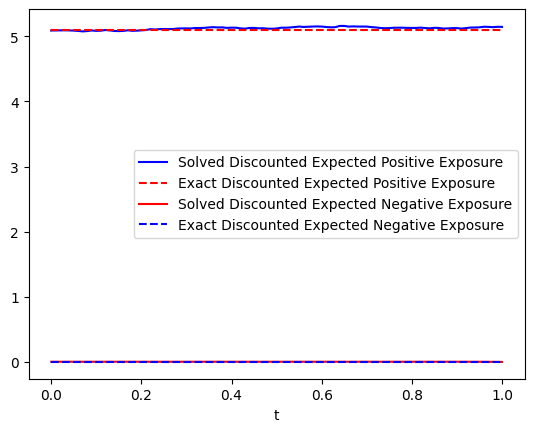

In [25]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,epe_exact,'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,ene_exact,'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [33]:
np.mean((epe_exact - epe)**2)

0.0012324558006876975

In [31]:
var = np.abs(np.quantile((Y_preds - Y_preds[:,0][:,None]), 0.05, axis=0))

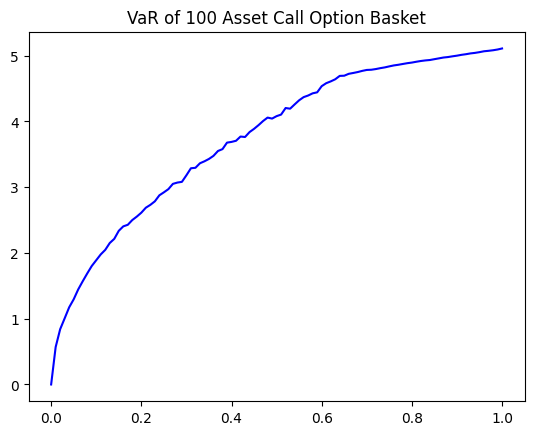

In [62]:
plt.title('VaR of 100 Asset Call Option Basket')
plt.plot(time_stamps,var,'b',label='VaR')
plt.show()

In [26]:
model.save_model("models/100DCallOption.pth")